In [2]:
import tensorflow as ts
from tensorflow import keras
import numpy as np
import tensorflow.keras.backend as K

In [3]:
def minha_funcao_de_perda(y_true, y_pred):
    a, beta, e, x0, T = 0.0, 2.0, 1.0, 5.0, 1.0,   # adicionado ponto decimal aos valores inteiros
    
    # calcular a diferença y_pred[i] - c * sum(y_pred)
    # hs = 0.02
    # diff =  beta * e * (T + x0 - a) - y_pred - hs*beta * e * K.sum(y_pred, axis=1, keepdims=True)

    n = K.int_shape(y_pred)[1]
    h = 1.0 / n
    trapezoids = h / 2.0 * (y_pred[:, 0] + y_pred[:, n-1] + 2 * K.sum(y_pred[:, 1:n-1], axis=1))
    diff = y_pred - beta*e*(T+x0-a)+beta*e * trapezoids[:, None]
    
    # calcular a norma L2 para cada exemplo
    norma = K.sqrt(K.sum(K.square(diff), axis=1))
    
    # retornar a média da norma L2 sobre todos os exemplos de treinamento
    return K.mean(norma)

def minha_funcao_de_perda2(y_true, y_pred):
    a, beta, e, x0, T = 0.0, 2.0, 1.0, 5.0, 1.0,   # adicionado ponto decimal aos valores inteiros
    
    # calcular a diferença y_pred[i] - c * sum(y_pred)
    n = K.int_shape(y_pred)[1]
    hs = 1.0 / n
    diff =  beta * e * (T + x0 - a) - y_pred - hs*beta * e * K.sum(y_pred, axis=1, keepdims=True)
    
    # calcular a norma L2 para cada exemplo
    norma = K.sqrt(K.sum(K.square(diff), axis=1))
    
    # retornar a média da norma L2 sobre todos os exemplos de treinamento
    return K.mean(norma)
# # exemplo de uso
# y_true = np.array([[1.25, 2.5, 3], [4.0, 5.2, 6.1]])
# y_pred = np.array([[2.12, 4.1, 6.5], [8, 10.67, 12]])

# loss = minha_funcao_de_perda(y_true, y_pred)
# print(f"Loss: {loss:.4f}")


In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer

# Tamanho da entrada
n = 100

# Número de neurônios nas camadas ocultas
n1 = 5
# n2 = 2

# Criação do modelo
model = Sequential()

# Adicionando as camadas ao modelo
model.add(InputLayer(input_shape=(n,)))
model.add(Dense(n1, activation='relu'))
# model.add(Dense(n2, activation='relu'))
model.add(Dense(n, activation='linear'))

# Compilando o modelo
model.compile(loss=minha_funcao_de_perda2, optimizer='adam')

# Dados de treinamento
X_train = np.linspace(0,1,n).reshape(1,n)
y_train = np.linspace(0,1,n).reshape(1,n)

# Treinando o modelo
model.fit(X_train, y_train, epochs=1000)

# Fazendo uma previsão
y_pred = model.predict(X_train).ravel()


Epoch 1/1000
1/1 [==============================] - 1s 987ms/step - loss: 122.3909
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 122.1680
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 121.9485
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 121.7324
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 121.5198
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 121.3106
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 121.1049
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 120.9025
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 120.7035
Epoch 10/1000
1/1 [==============================] - 0s 19ms/step - loss: 120.5078
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 120.3153
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 120.1257
Epoch 13/1000


In [32]:
y_pred

array([3.9978924, 3.9976394, 3.9976647, 3.9977252, 3.99797  , 3.9977539,
       3.9978182, 3.9977524, 3.997911 , 3.9979343, 3.9976819, 3.997877 ,
       3.997898 , 3.9978108, 3.9979362, 3.9979134, 3.9977307, 3.9978626,
       3.9978385, 3.9979937, 3.9979107, 3.9979239, 3.9977434, 3.9980164,
       3.9979281, 3.9978862, 3.9977531, 3.9980235, 3.9977462, 3.9979742,
       3.9976754, 3.9976816, 3.9978333, 3.9978724, 3.9977129, 3.9978414,
       3.997845 , 3.9976606, 3.9979026, 3.9979112, 3.9980118, 3.9977005,
       3.9978297, 3.9979208, 3.9977531, 3.9978776, 3.9976308, 3.9980118,
       3.9979205, 3.9977844, 3.997796 , 3.997932 , 3.9979348, 3.9976568,
       3.997754 , 3.997956 , 3.9977334, 3.9978406, 3.9977143, 3.9978652,
       3.9977927, 3.9979012, 3.997923 , 3.9979084, 3.9978719, 3.9978766,
       3.9976492, 3.9976988, 3.99778  , 3.9979618, 3.99791  , 3.9978607,
       3.9978752, 3.997821 , 3.997848 , 3.9978774, 3.9978738, 3.9980223,
       3.9979105, 3.9978848, 3.9977992, 3.9978354, 

[(3.0, 5.0), (0.0, 1.0), Text(0.5, 0, '$t$'), Text(0, 0.5, '$x^2$')]

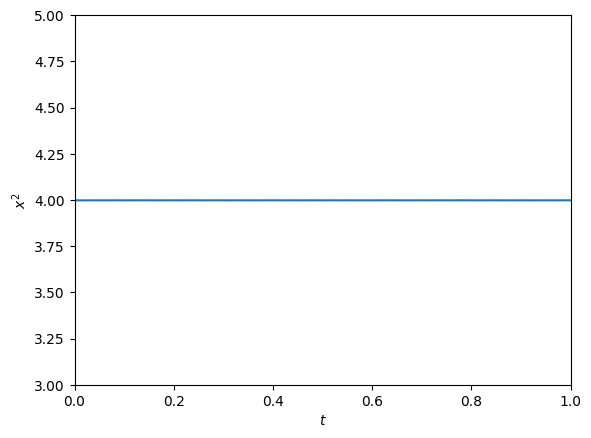

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplot()
sns.lineplot(x = np.linspace(0,1,n),y=y_pred,ax=ax)
ax.set(ylim=[3,5],xlim=[0,1],xlabel="$t$",ylabel="$x^2$")
